![vki_logo](https://www.skywin.be/sites/default/files/logo-membres/vki_logo_blue_rectangular.jpg)
### MODULO: A package for Multiscale Proper Orthogonal Decomposition
#### Tutorial 4: Memory Saving Feature

 The idea is to compute all the decomposition without never assembling the
 matrix D. This makes the computation much slower, because of the time
 lost in reading/saving things on the disk, but it allows to process 
 datasets that are too large to fit in you RAM.

 In MODULO, the memory saving feature is currently implemented for
 the POD (if done via matrix K) and mPOD.

 The test case in this tutorial (and the results you will produce) are taken from [here](https://arxiv.org/pdf/2001.01971.pdf)



#### Part 1: download the data 
As usual we download the data and store it locally

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
import os  # To create folders an delete them

from modulo.utils.read_db import ReadData # to read the data

from modulo.modulo import MODULO
from modulo.utils.others import plot_grid_cylinder_flow,Plot_Field_TEXT_Cylinder


### Plot Customization (Optional )
fontsize = 16
plt.rc('text', usetex=True)      
plt.rc('font', family='serif')
plt.rcParams['xtick.labelsize'] = fontsize
plt.rcParams['ytick.labelsize'] = fontsize
plt.rcParams['axes.labelsize'] = fontsize
plt.rcParams['legend.fontsize'] = fontsize
plt.rcParams['font.size'] = fontsize


FOLDER='Tutorial_5_2D_Cylinder_Memory_Saving'
if not os.path.exists(FOLDER):
    os.mkdir(FOLDER)

# Script 1: Get the Data
import urllib.request
print('Downloading PIV data TR PIV Cyl...')
url = 'https://osf.io/47ftd/download'
urllib.request.urlretrieve(url, 'Ex_5_TR_PIV_Cylinder.zip')
print('Download Completed! I prepare data Folder')
# Unzip the file 
from zipfile import ZipFile; import shutil
String='Ex_5_TR_PIV_Cylinder.zip'
zf = ZipFile(String,'r'); 
zf.extractall('./DATA_CYLINDER'); zf.close()
shutil.move('DATA_CYLINDER', FOLDER+os.sep+'data') # rename the data flolder to FOLDER
os.remove(String) # Delete the zip file with the data 
print('Data set unzipped and ready ! ')

n_t=13200; Fs=3000; dt=1/Fs 
t=np.linspace(0,dt*(n_t-1),n_t) # prepare the time axis# 



Download Completed! I prepare data Folder
Data set unzipped and ready ! 


#### Read the data
Explore the content of the folder data. Here we read and plot one snapshot 

c:\users\mendez\documents\github\modulo\modulo\utils\others.py:312: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((0,0),2.5,fill=True,color='r',edgecolor='k',alpha=0.5)


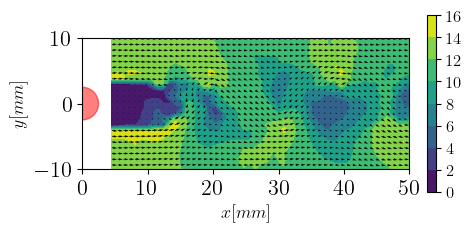

Tutorial_5_2D_Cylinder_Memory_Saving\Cylinder_Flow_snapshot_2.png printed


In [5]:
# --- Header (H),  footer (F) and columns (C) to be skipped during acquisition
H = 1; F = 0; C=0
# --- Read one sample snapshot (to get N_S)
Name = FOLDER+os.sep+'data'+os.sep+"Res00001.dat"
Dat = np.genfromtxt(Name, skip_header=H, skip_footer=F)
# --- Component fields (N=2 for 2D velocity fields, N=1 for pressure fields)
N = Dat.shape[1]
# --- Number of mesh points and snapshots
nxny = Dat.shape[0]; N_T=n_t

Name_Mesh=FOLDER+os.sep+'data'+os.sep+'MESH.dat'
Name_FIG=FOLDER+os.sep+'Cylinder_Flow_snapshot_'+str(2)+'.png'

# This function reads all the info about the grid
n_s,Xg,Yg,Vxg,Vyg,X_S,Y_S=Plot_Field_TEXT_Cylinder(Name,Name_Mesh,Name_FIG) 
# number of points in x and y
n_x,n_y=np.shape(Xg)

###### Prepare Partitions 
Here we prepare the partitions using data_processing. We call it with D=None (meaning modulo knows it has to read) and we export the partitions in MODULO_temp. Check out that folder. Then, when calling modulo we give no data and set FOLDER_OUT to the previous folder. This means two things: (1) modulo will look for data blocks there (2) it will continue to export every relevant intermediate result in that folder 

In [6]:
# Prepare 10 partitions
D = ReadData._data_processing(D=None,FOLDER_IN=FOLDER+os.sep+'data', 
                              filename='Res%05d',
                              N=2, N_S=2*nxny,N_T=N_T,
                              h = H, f = F, c=C,
                              N_PARTITIONS=10, MR= False,
                              FOLDER_OUT=FOLDER+os.sep+'MODULO_tmp')

# --- Initialize MODULO object
m = MODULO(data=None,N_T=N_T,
           FOLDER_OUT=FOLDER+os.sep,
           N_S=2*nxny,
           n_Modes=100,
           N_PARTITIONS=10,eig_solver='svd_sklearn_randomized')

Data matrix was not provided, reading it from Tutorial_5_2D_Cylinder_Memory_Saving\data
Memory Saving feature is active. Partitioning Data Matrix...
Working on block 1/10


100%|█████████████████████████████████████████████████████████████████████████████| 1320/1320 [00:09<00:00, 137.27it/s]


Partition 1/10 saved
Working on block 2/10


100%|█████████████████████████████████████████████████████████████████████████████| 1320/1320 [00:09<00:00, 134.46it/s]


Partition 2/10 saved
Working on block 3/10


100%|█████████████████████████████████████████████████████████████████████████████| 1320/1320 [00:09<00:00, 134.77it/s]


Partition 3/10 saved
Working on block 4/10


100%|█████████████████████████████████████████████████████████████████████████████| 1320/1320 [00:10<00:00, 129.54it/s]


Partition 4/10 saved
Working on block 5/10


100%|█████████████████████████████████████████████████████████████████████████████| 1320/1320 [00:09<00:00, 135.80it/s]


Partition 5/10 saved
Working on block 6/10


100%|█████████████████████████████████████████████████████████████████████████████| 1320/1320 [00:09<00:00, 136.22it/s]


Partition 6/10 saved
Working on block 7/10


100%|█████████████████████████████████████████████████████████████████████████████| 1320/1320 [00:09<00:00, 137.30it/s]


Partition 7/10 saved
Working on block 8/10


100%|█████████████████████████████████████████████████████████████████████████████| 1320/1320 [00:09<00:00, 137.05it/s]


Partition 8/10 saved
Working on block 9/10


100%|█████████████████████████████████████████████████████████████████████████████| 1320/1320 [00:10<00:00, 131.57it/s]


Partition 9/10 saved
Working on block 10/10


100%|█████████████████████████████████████████████████████████████████████████████| 1320/1320 [00:10<00:00, 130.94it/s]


Partition 10/10 saved
MODULO (MODal mULtiscale pOd) is a software developed at the von Karman Institute to perform data driven modal decomposition of numerical and experimental data. 

Modulo assumes you have a uniform grid. If not, please give the weights as parameters of MODULO!


##### Compute the POD
we now compute the POD. What changes with respect to the previous cases? Nothing! the object modulo knows already everything it needs so just call the POD method. Note that here we must go for POD_K (it is not possible to use the memory saving otherwise).


In [7]:
# compute the POD (without having loaded D! )
Phi_POD, Psi_POD, Sigma_POD = m.compute_POD_K()

Computing correlation matrix D matrix...

 Using Memory Saving feature...


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:15<00:00,  1.55s/it]


Computing Temporal Basis...
diagonalizing K....
Saving POD temporal basis
Done.
Computing Spatial Basis...
Computing Phi from D...
Done.


The rest is just plotting: here we go for the plotting of the POD

c:\users\mendez\documents\github\modulo\modulo\utils\others.py:443: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((0,0),2.5,fill=True,color='r',edgecolor='k',alpha=0.5)


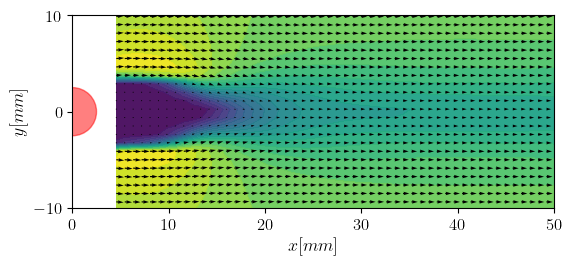

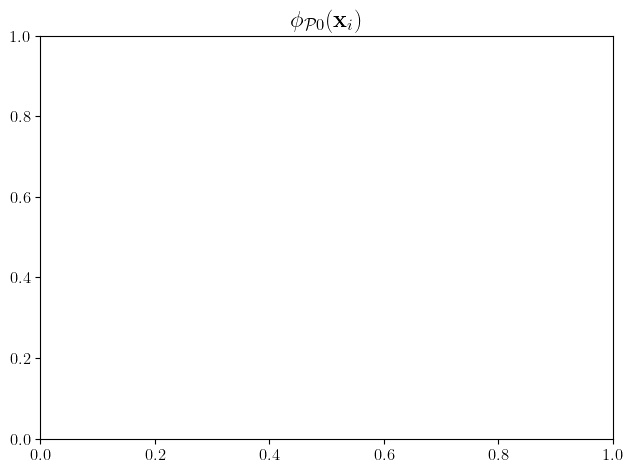

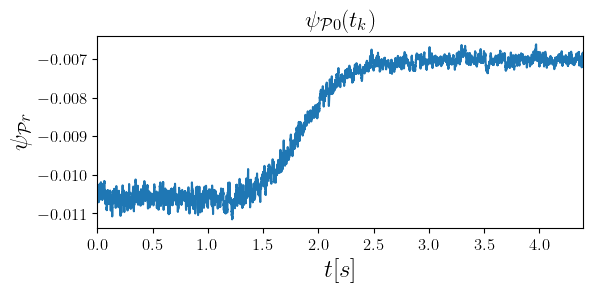

C:\Users\mendez\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


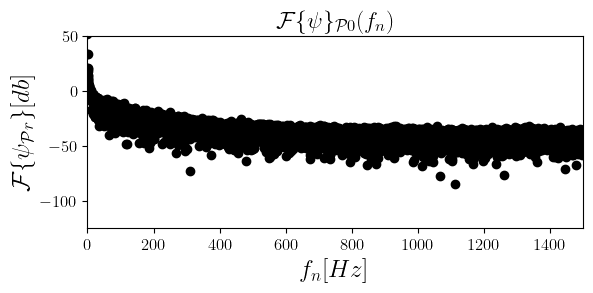

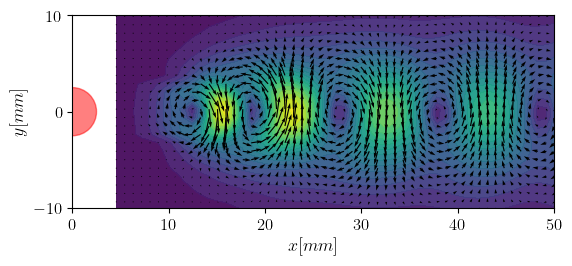

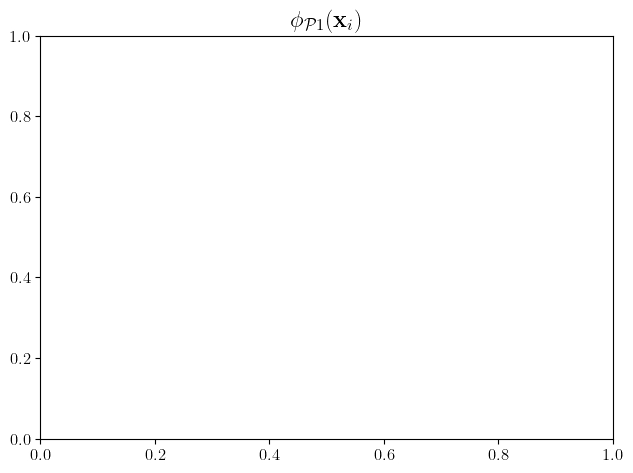

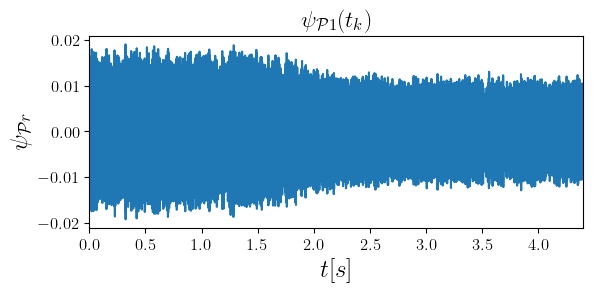

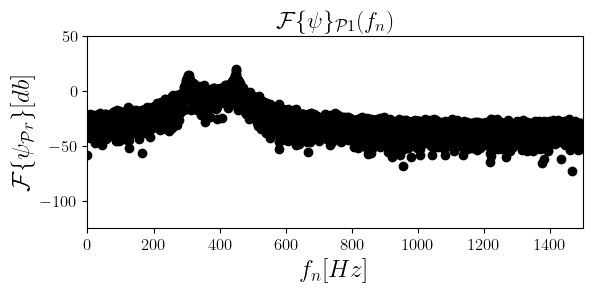

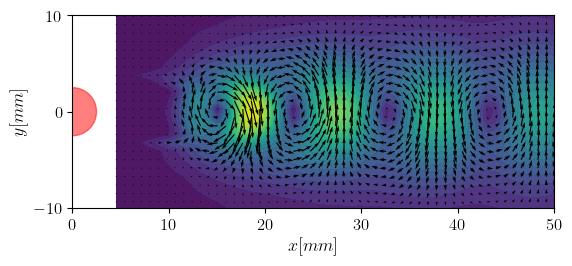

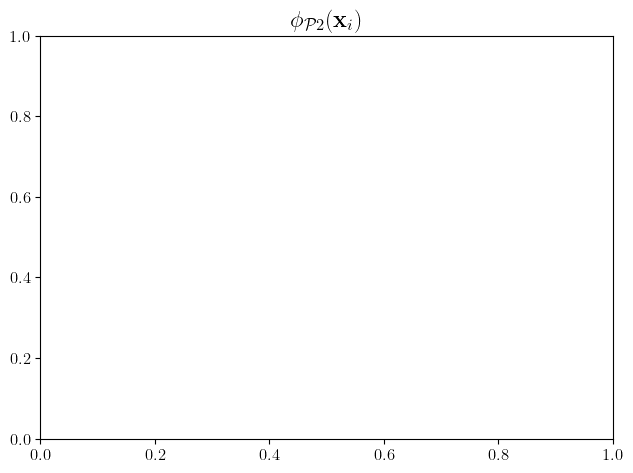

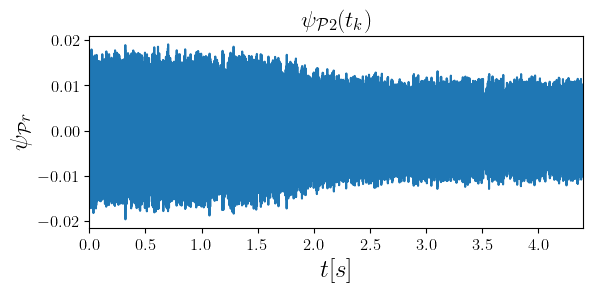

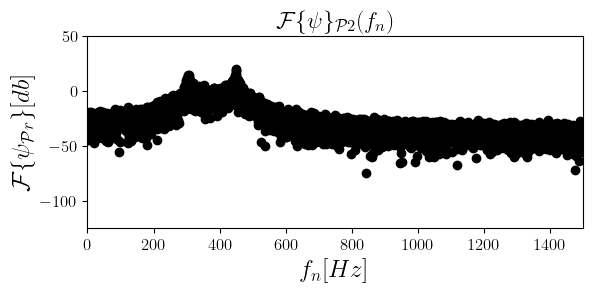

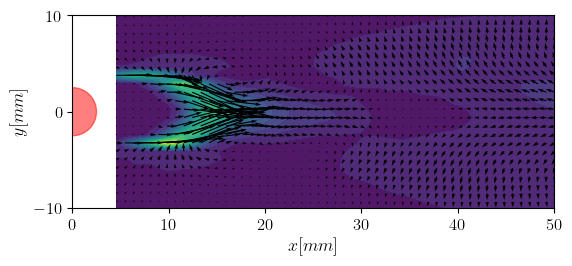

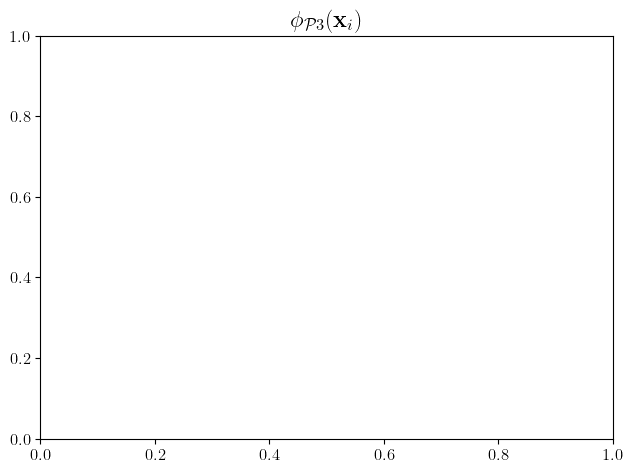

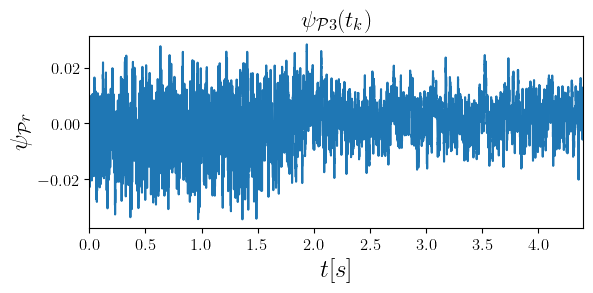

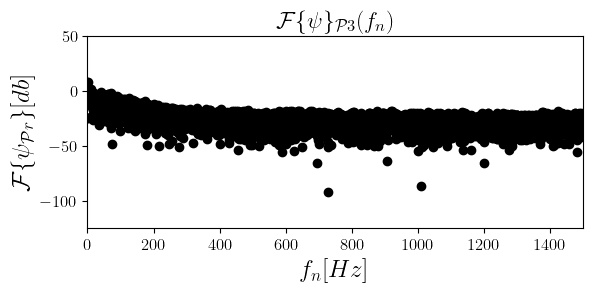

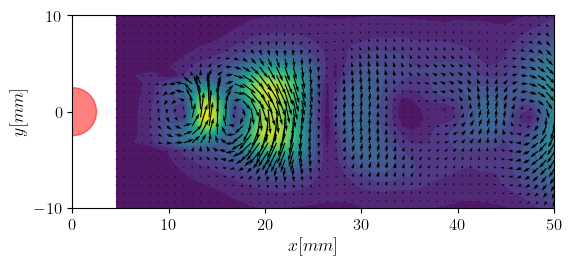

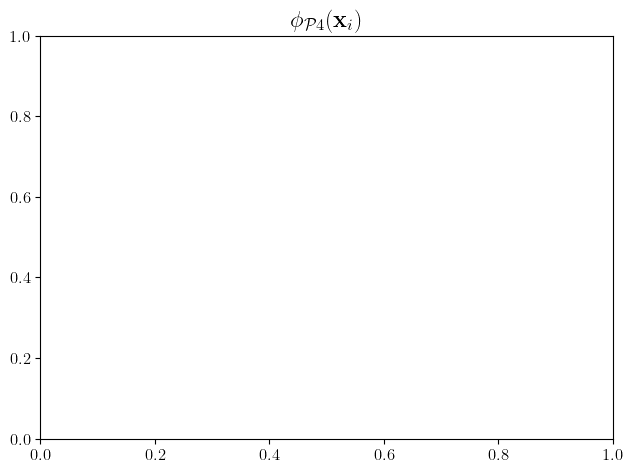

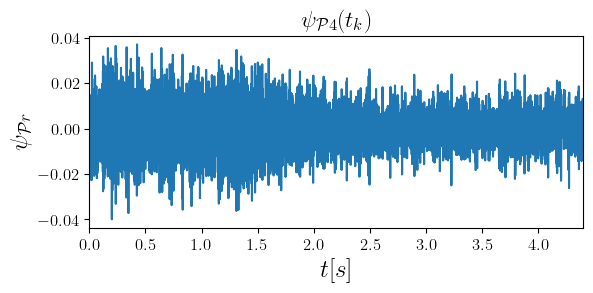

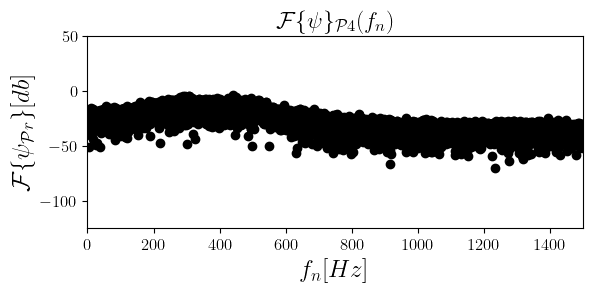

In [8]:
# Prepare the frequencies 
Freqs = np.fft.fftfreq(N_T) * Fs  # Compute the frequency bins

FOLDER_POD_RESULTS=FOLDER+os.sep+'POD_Results_Cylinder_PIV'
if not os.path.exists(FOLDER_POD_RESULTS):
    os.makedirs(FOLDER_POD_RESULTS)


# Plot the spatial structures and the spectra of the first 3 modes
for r in range(5):
 #%% Take the mode's structure
 Phi_P_Mode_U=np.real(Phi_POD[0:nxny,r]).reshape((n_y,n_x))
 Phi_P_Mode_V=np.real(Phi_POD[nxny::,r]).reshape((n_y,n_x))
 # Assign to Vxg, Vyg which will be plot
 Vxg=Phi_P_Mode_U; Vyg=Phi_P_Mode_V
 plot_grid_cylinder_flow(Xg.T , Yg.T, Vxg, Vyg)
 ax = plt.gca()
 Tit_string='$\phi_{\mathcal{P}'+str(r)+'}(\mathbf{x}_i)$'
 plt.title(Tit_string,fontsize=17)
 plt.tight_layout(pad=0.6, w_pad=0.3, h_pad=0.8)
 Name=FOLDER_POD_RESULTS+os.sep+'POD_Phi_'+str(r)+'R.png'
 plt.savefig(Name, dpi=200) 
 plt.show()

 #%% Plot the temporal evolution of the structure 
 fig, ax = plt.subplots(figsize=(6, 3)) # This creates the figure
 plt.plot(t,-Psi_POD[:,r])
 plt.xlim([0,t.max()])
 #ax.set_xscale('log')
 plt.xlabel('$ t [s]$',fontsize=18)
 plt.ylabel('$\psi_{\mathcal{P}r}$',fontsize=18)
 Tit_string='$\psi_{\mathcal{P}'+str(r)+'}(t_k)$'
 plt.title(Tit_string,fontsize=17)
 plt.tight_layout(pad=0.6, w_pad=0.3, h_pad=0.8)
 Name=FOLDER_POD_RESULTS+os.sep+'POD_Psi_'+str(r)+'R.png'
 plt.savefig(Name, dpi=200) 
 plt.show()

 #%% Plot the spectral content of the structure 
 fig, ax = plt.subplots(figsize=(6, 3)) # This creates the figure
 psi_hat=np.fft.fft(Psi_POD[:,r]*Sigma_POD[r]/n_t)
 plt.plot(Freqs,20*np.log10(psi_hat),'ko')
 plt.xlim([0,1500])
 plt.ylim([-125,50])
 #ax.set_xscale('log')
 plt.xlabel('$ f_n [Hz]$',fontsize=18)
 plt.ylabel('$\mathcal{F}\{\psi_{\mathcal{P}r}\} [db]$',fontsize=18)
 Tit_string='$\mathcal{F}\{\psi\}_{\mathcal{P}'+str(r)+'}(f_n)$'
 plt.title(Tit_string,fontsize=17)
 plt.tight_layout(pad=0.6, w_pad=0.3, h_pad=0.8)
 Name=FOLDER_POD_RESULTS+os.sep+'POD_Psi_hat_'+str(r)+'R.png'
 plt.savefig(Name, dpi=200) 
 plt.show()

##### Compute the mPOD
This portion of the code is also not influenced by whether you use memory saving or not. The inputs are the same as the old version of modulo and should be clear from the docs. We have splitting vectors forcing bounding the frequency content from 0 to 10, from 10 to 290, from 290 to 320 etc (measured in Hz). See [this tutorial](https://www.youtube.com/watch?v=y2uSvdxAwHk) for more details on how to use it 

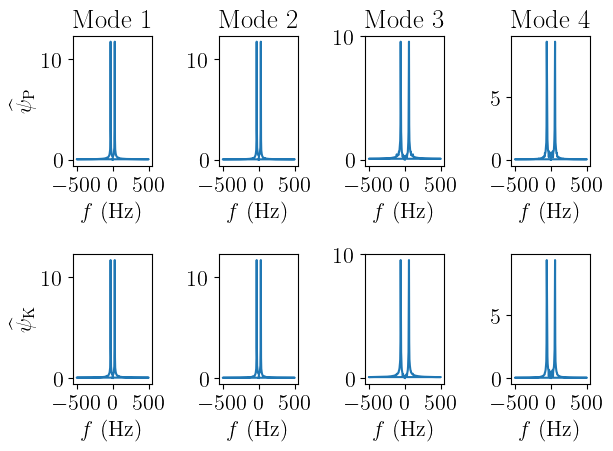

C:\Users\mendez\AppData\Local\Temp\ipykernel_9308\1160106644.py:46: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((0,0),0.0075,fill=True,color='r',edgecolor='k',alpha=0.5)


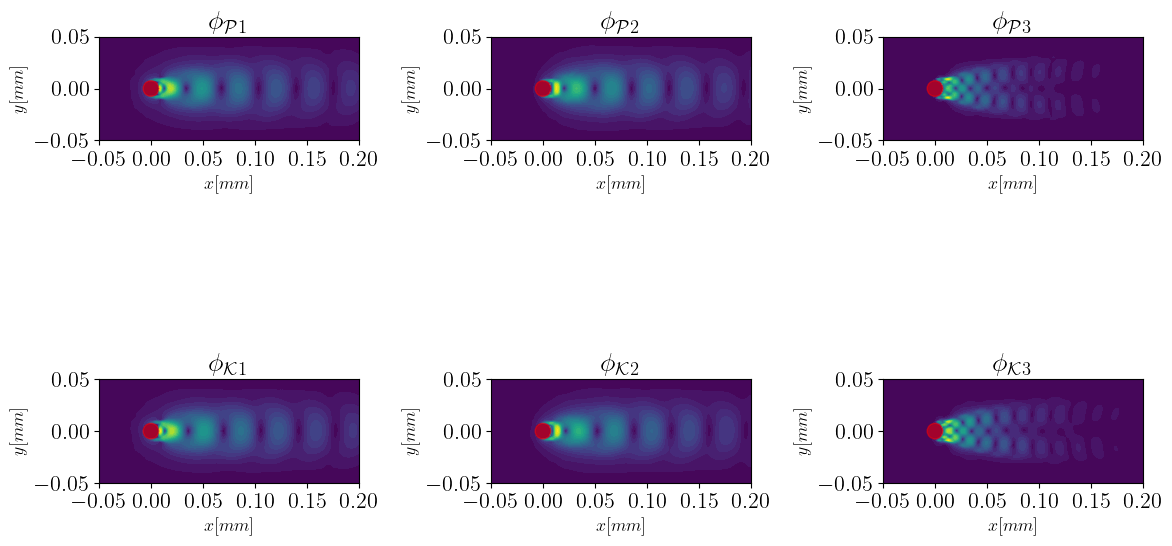

In [20]:
# mPOD Settings
# Frequency splitting Vector
F_V=np.array([10,290,320,430,470])
# This vector collects the length of the filter kernels.
Nf=np.array([1201,801,801,801,801]); 
Keep=np.array([1,0,1,1,0])
Ex=1203; boundaries = 'nearest'; MODE = 'reduced'
# Compute the mPOD 
m = MODULO(None,
           N_T=13200,
           N_S=2*nxny,
           N_PARTITIONS=10,
           n_Modes = 500,           
           eig_solver='svd_sklearn_randomized')

Phi_M,Psi_M,Sigmas_M = m.compute_mPOD(Nf=Nf,
                                      Ex=Ex,
                                      F_V=F_V,
                                      Keep=Keep,
                                      SAT=5,
                                      boundaries=boundaries,
                                      MODE=MODE,dt=1/Fs,SAVE=True)

#### Post Process the mPOD
The rest is post processing of the mPOD. We produce the same kind of plots!

In [ ]:

FOLDER_mPOD_RESULTS=FOLDER+os.sep+'mPOD_Results_Cylinder_PIV'
if not os.path.exists(FOLDER_mPOD_RESULTS):
    os.makedirs(FOLDER_mPOD_RESULTS)

# Plot the spatial structures and the spectra of the first 3 modes
for r in range(5):
 #%% Take the mode's structure
 Phi_M_Mode_U=np.real(Phi_M[0:nxny,r]).reshape((n_y,n_x))
 Phi_M_Mode_V=np.real(Phi_M[nxny::,r]).reshape((n_y,n_x))
 # Assign to Vxg, Vyg which will be plot
 Vxg=Phi_M_Mode_U; Vyg=Phi_M_Mode_V
 plot_grid_cylinder_flow(Xg.T , Yg.T, Vxg, Vyg)
 ax = plt.gca()
 Tit_string='$\phi_{\mathcal{M}'+str(r)+'}(\mathbf{x}_i)$'
 plt.title(Tit_string,fontsize=17)
 plt.tight_layout(pad=0.6, w_pad=0.3, h_pad=0.8)
 Name=FOLDER_mPOD_RESULTS+os.sep+'mPOD_Phi_'+str(r)+'R.png'
 plt.savefig(Name, dpi=200) 
 plt.show()

 #%% Plot the temporal evolution of the structure 
 fig, ax = plt.subplots(figsize=(6, 3)) # This creates the figure
 plt.plot(t,-Psi_M[:,r])
 plt.xlim([0,t.max()])
 #ax.set_xscale('log')
 plt.xlabel('$ t [s]$',fontsize=18)
 plt.ylabel('$\psi_{\mathcal{M}r}$',fontsize=18)
 Tit_string='$\psi_{\mathcal{M}'+str(r)+'}(t_k)$'
 plt.title(Tit_string,fontsize=17)
 plt.tight_layout(pad=0.6, w_pad=0.3, h_pad=0.8)
 Name=FOLDER_mPOD_RESULTS+os.sep+'mPOD_Psi_'+str(r)+'R.png'
 plt.savefig(Name, dpi=200) 
 plt.show()

 #%% Plot the spectral content of the structure 
 fig, ax = plt.subplots(figsize=(6, 3)) # This creates the figure
 psi_hat=np.fft.fft(Psi_M[:,r]*Sigmas_M[r]/n_t)
 plt.plot(Freqs,20*np.log10(psi_hat),'ko')
 plt.xlim([0,1500])
 plt.ylim([-125,50])
 #ax.set_xscale('log')
 plt.xlabel('$ f_n [Hz]$',fontsize=18)
 plt.ylabel('$\mathcal{F}\{\psi_{\mathcal{M}r}\} [db]$',fontsize=18)
 Tit_string='$\mathcal{F}\{\psi\}_{\mathcal{M}'+str(r)+'}(f_n)$'
 plt.title(Tit_string,fontsize=17)
 plt.tight_layout(pad=0.6, w_pad=0.3, h_pad=0.8)
 Name=FOLDER_mPOD_RESULTS+os.sep+'mPOD_Psi_hat_'+str(r)+'R.png'
 plt.savefig(Name, dpi=200) 
 plt.show()
